# What questions do we want to investigate here?

1. Which tracks have the most/least consensus among annotators?
2. Which annotators have the most/least consensus among each other?

Each of the above can be approached with each metric.  What do we want to show with l-measures?

- That disagreement in L-measure implies disagreement in other metrics
- That agreement in L-measure does not necessarily imply agreement elsewhere
    - ie, L-measure is robust to variation in annotation level that the others are not
    
- Scatter plot flat metric vs L-measure, break into quadrants
    - should be triangular

In [1]:
import pandas as pd
import os
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
%matplotlib nbagg

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
import jams

In [3]:
tracks = [os.path.basename(_)
          for _ in jams.util.find_with_extension('/home/bmcfee/git/msaf-data/SPAM/references/', 'jams')]

In [4]:
results = pickle.load(open('../data/spam_all_results.pickle', 'rb'))

In [5]:
results = {k: v for k, v in zip(tracks, results)}

In [6]:
R = pd.Panel4D(data=results)

In [7]:
R = R.swapaxes(1, 2).swapaxes(0, 1)

In [8]:
R.keys()

Index(['LOWER_F-measure@0.5', 'LOWER_F-measure@3.0', 'LOWER_NCE F-measure',
       'LOWER_NCE Over', 'LOWER_NCE Under', 'LOWER_Pairwise F-measure',
       'LOWER_Pairwise Precision', 'LOWER_Pairwise Recall',
       'LOWER_Precision@0.5', 'LOWER_Precision@3.0', 'LOWER_Recall@0.5',
       'LOWER_Recall@3.0', 'MULTI_L-Measure', 'MULTI_L-Precision',
       'MULTI_L-Recall', 'MULTI_T-Measure full', 'MULTI_T-Measure reduced',
       'MULTI_T-Precision full', 'MULTI_T-Precision reduced',
       'MULTI_T-Recall full', 'MULTI_T-Recall reduced', 'UPPER_F-measure@0.5',
       'UPPER_F-measure@3.0', 'UPPER_NCE F-measure', 'UPPER_NCE Over',
       'UPPER_NCE Under', 'UPPER_Pairwise F-measure',
       'UPPER_Pairwise Precision', 'UPPER_Pairwise Recall',
       'UPPER_Precision@0.5', 'UPPER_Precision@3.0', 'UPPER_Recall@0.5',
       'UPPER_Recall@3.0'],
      dtype='object')

In [9]:
BNDU = pd.Series(data=R['UPPER_F-measure@0.5'].values.ravel(), name='F Upper')
BNDL = pd.Series(data=R['LOWER_F-measure@0.5'].values.ravel(), name='F Lower')
TMR = pd.Series(data=R['MULTI_T-Measure reduced'].values.ravel(), name='T-Measure reduced')
TMF = pd.Series(data=R['MULTI_T-Measure full'].values.ravel(), name='T-Measure full')

In [10]:
df = pd.DataFrame(data=[BNDU, BNDL, TMR, TMF]).T

<IPython.core.display.Javascript object>


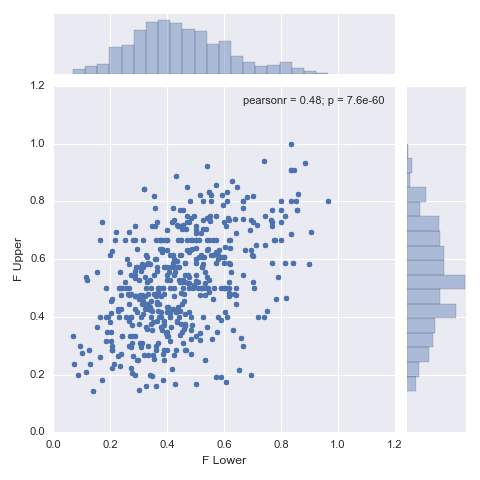

In [11]:
sns.jointplot(df['F Lower'], df['F Upper'])

<IPython.core.display.Javascript object>


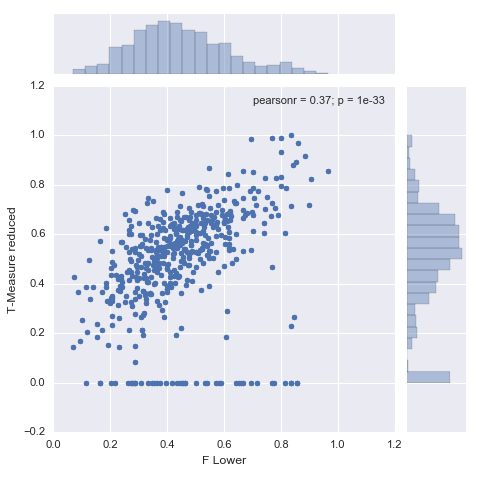

In [12]:
sns.jointplot(df['F Lower'], df['T-Measure reduced'])

<IPython.core.display.Javascript object>


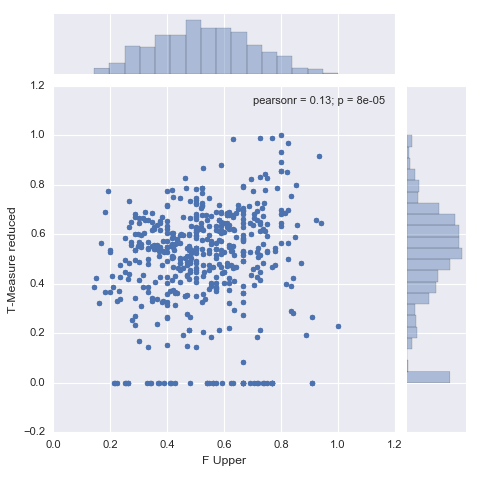

In [12]:
sns.jointplot(df['F Upper'], df['T-Measure reduced'])

<IPython.core.display.Javascript object>


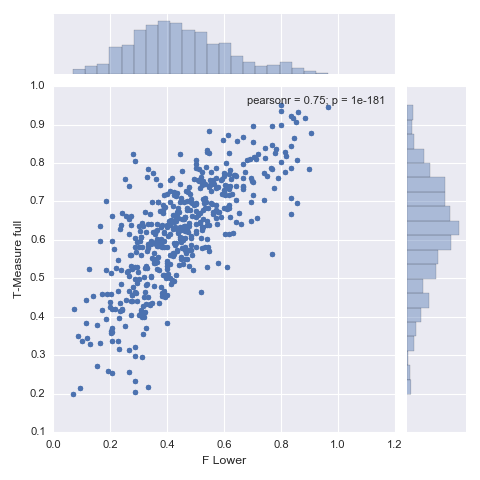

In [45]:
sns.jointplot(df['F Lower'], df['T-Measure full'])

<IPython.core.display.Javascript object>


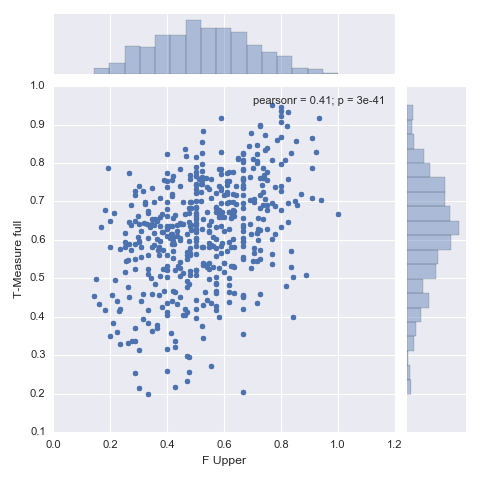

In [13]:
sns.jointplot(df['F Upper'], df['T-Measure full'])

In [15]:
def flatter(pan, key):
    
    df = pan[key].to_frame().stack()
    df.name = key
    
    return df

In [16]:
NCEL = flatter(R, 'LOWER_NCE F-measure')
NCEU = flatter(R, 'UPPER_NCE F-measure')
PFL = flatter(R, 'LOWER_Pairwise F-measure')
PFU = flatter(R, 'UPPER_Pairwise F-measure')
LM = flatter(R, 'MULTI_L-Measure')

In [17]:
df = pd.DataFrame(data=[NCEU, NCEL, PFL, PFU, LM]).T.dropna()

<IPython.core.display.Javascript object>


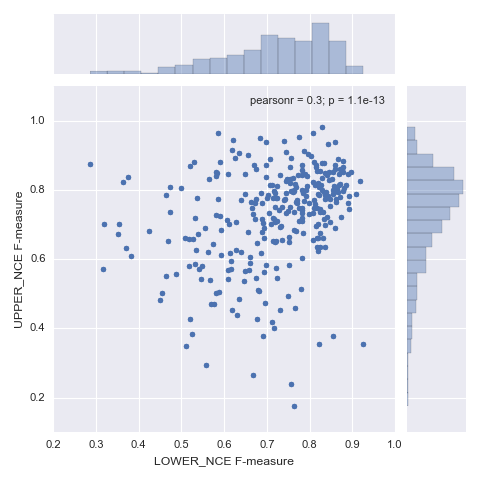

In [18]:
sns.jointplot(df['LOWER_NCE F-measure'], df['UPPER_NCE F-measure'])

<IPython.core.display.Javascript object>


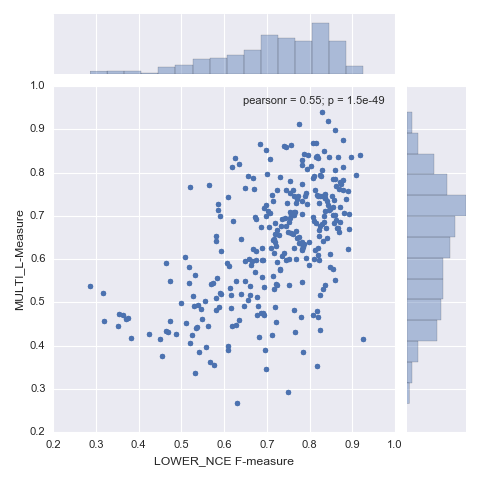

In [37]:
sns.jointplot(df['LOWER_NCE F-measure'], df['MULTI_L-Measure'])

<IPython.core.display.Javascript object>


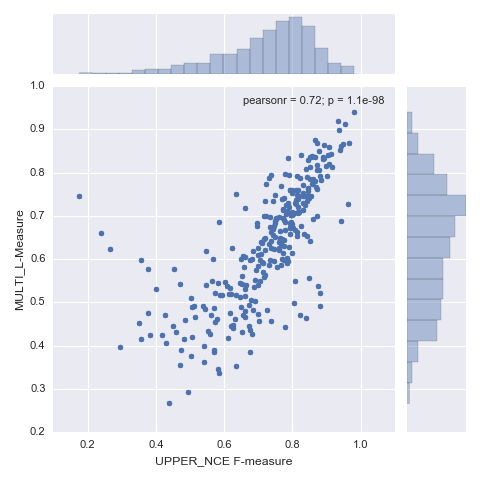

In [19]:
sns.jointplot(df['UPPER_NCE F-measure'],
              df['MULTI_L-Measure'], kind='scatter')

<IPython.core.display.Javascript object>


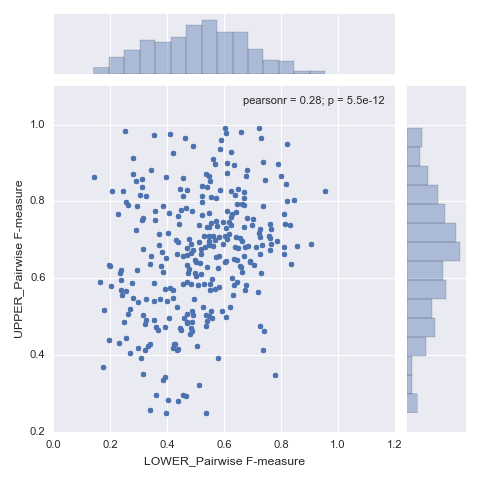

In [38]:
sns.jointplot(df['LOWER_Pairwise F-measure'],
              df['UPPER_Pairwise F-measure'], kind='scatter')

<IPython.core.display.Javascript object>


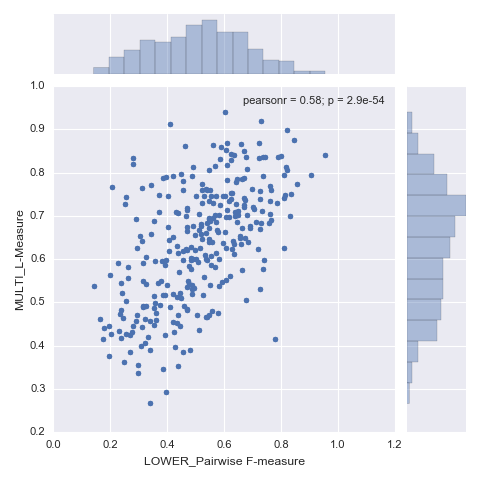

In [20]:
sns.jointplot(df['LOWER_Pairwise F-measure'],
              df['MULTI_L-Measure'], kind='scatter')

<IPython.core.display.Javascript object>


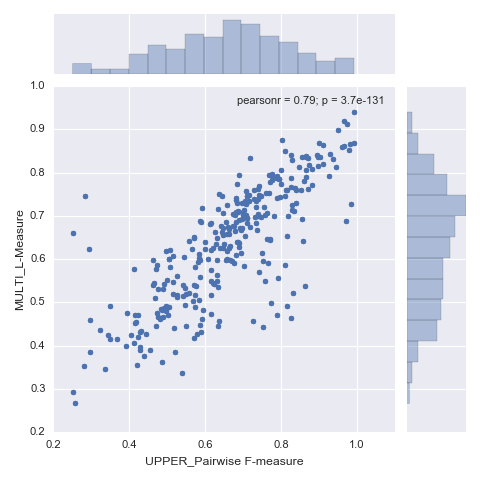

In [21]:
sns.jointplot(df['UPPER_Pairwise F-measure'],
              df['MULTI_L-Measure'], kind='scatter')

In [23]:
ann_mean = df.reset_index().groupby('major').mean()
ann_variance = df.reset_index().groupby('major').var()

In [24]:
track_mean = df.reset_index().groupby('level_2').mean()
track_variance = df.reset_index().groupby('level_2').var()

<IPython.core.display.Javascript object>


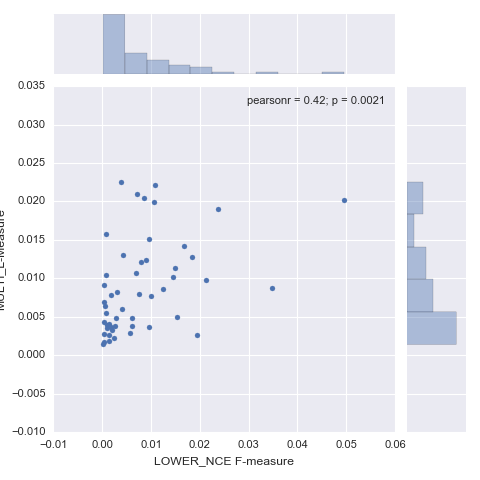

In [25]:
sns.jointplot(track_variance['LOWER_NCE F-measure'],
              track_variance['MULTI_L-Measure'], kind='scatter')

In [26]:
ann_mean

,UPPER_NCE F-measure,LOWER_NCE F-measure,LOWER_Pairwise F-measure,UPPER_Pairwise F-measure,MULTI_L-Measure
major,,,,,
Colin Hua,0.727336,0.712933,0.512076,0.660033,0.633598
Eleni Vasilia Maltas,0.735073,0.714191,0.479077,0.662305,0.634839
Evan S. Johnson,0.717450,0.742232,0.547723,0.661161,0.645596
John Turner,0.715716,0.697257,0.510723,0.656895,0.625579


In [27]:
ann_variance

,UPPER_NCE F-measure,LOWER_NCE F-measure,LOWER_Pairwise F-measure,UPPER_Pairwise F-measure,MULTI_L-Measure
major,,,,,
Colin Hua,0.018572,0.014261,0.023210,0.025726,0.018420
Eleni Vasilia Maltas,0.015570,0.014555,0.022701,0.025914,0.019131
Evan S. Johnson,0.023305,0.013962,0.028006,0.027911,0.019054
John Turner,0.022437,0.022067,0.032713,0.024227,0.018581


In [28]:
track_variance.describe()

,UPPER_NCE F-measure,LOWER_NCE F-measure,LOWER_Pairwise F-measure,UPPER_Pairwise F-measure,MULTI_L-Measure
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.010755,0.007945,0.015313,0.012184,0.008864
std,0.015227,0.009513,0.013338,0.009275,0.006141
min,0.000618,0.000170,0.002035,0.000919,0.001415
25%,0.003027,0.001406,0.005904,0.005324,0.003808
50%,0.005344,0.004939,0.008964,0.009035,0.007770
75%,0.011981,0.010412,0.023342,0.015267,0.012325
max,0.083811,0.049472,0.061263,0.036086,0.022590


<IPython.core.display.Javascript object>


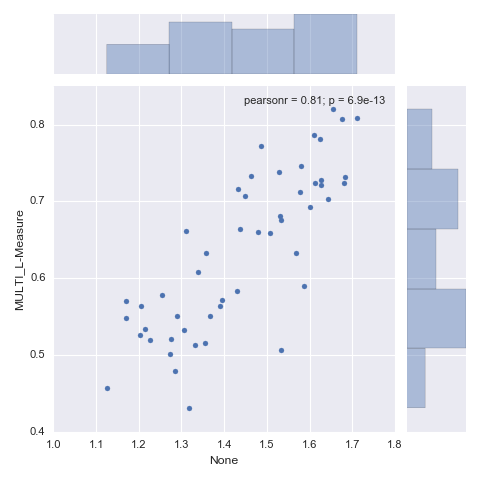

In [29]:
sns.jointplot(track_mean['UPPER_NCE F-measure'] + track_mean['LOWER_NCE F-measure'],
              track_mean['MULTI_L-Measure'], kind='scatter')

In [30]:
#name1 = 'Evan S. Johnson'
#name2 = 'Eleni Vasilia Maltas'
#filename = 'SALAMI_838.jams'

In [31]:
df.loc[df['LOWER_Pairwise F-measure'].argmin()]

UPPER_NCE F-measure         0.875181
LOWER_NCE F-measure         0.286276
LOWER_Pairwise F-measure    0.141325
UPPER_Pairwise F-measure    0.863306
MULTI_L-Measure             0.537360
Name: (Evan S. Johnson, John Turner, Cerulean_Miles_Davis_Quintet-Footprints.jams), dtype: float64

In [32]:
df.loc[df['LOWER_NCE F-measure'].argmin()]

UPPER_NCE F-measure         0.875181
LOWER_NCE F-measure         0.286276
LOWER_Pairwise F-measure    0.141325
UPPER_Pairwise F-measure    0.863306
MULTI_L-Measure             0.537360
Name: (Evan S. Johnson, John Turner, Cerulean_Miles_Davis_Quintet-Footprints.jams), dtype: float64

In [33]:
df.loc[df['UPPER_NCE F-measure'].argmin()]

UPPER_NCE F-measure         0.176386
LOWER_NCE F-measure         0.763343
LOWER_Pairwise F-measure    0.401727
UPPER_Pairwise F-measure    0.282934
MULTI_L-Measure             0.746843
Name: (Evan S. Johnson, John Turner, SALAMI_838.jams), dtype: float64

In [34]:
#name1, name2, filename = df['UPPER_Pairwise F-measure'].argmin()
#name1, name2, filename = df['LOWER_Pairwise F-measure'].argmin()
name1, name2, filename = df['UPPER_NCE F-measure'].argmin()
#name1, name2, filename = df['LOWER_NCE F-measure'].argmin()
#name1, name2, filename = df['MULTI_L-Measure'].argmin()
#name1, name2, filename = df['UPPER_Pairwise F-measure'].argmax()
#name1, name2, filename = df['LOWER_Pairwise F-measure'].argmax()
#name1, name2, filename = df['UPPER_NCE F-measure'].argmax()
#name1, name2, filename = df['LOWER_NCE F-measure'].argmax()
#name1, name2, filename = df['MULTI_L-Measure'].argmax()


#name1, name2, filename = (df['MULTI_L-Measure'] / df['UPPER_NCE F-measure']).argmax()

In [35]:
df.loc[name1, name2, filename]

UPPER_NCE F-measure         0.176386
LOWER_NCE F-measure         0.763343
LOWER_Pairwise F-measure    0.401727
UPPER_Pairwise F-measure    0.282934
MULTI_L-Measure             0.746843
Name: (Evan S. Johnson, John Turner, SALAMI_838.jams), dtype: float64

In [36]:
import jams.display

In [37]:
jam = jams.load(os.path.join('/home/bmcfee/git/msaf-data/SPAM/references/', filename))

In [38]:
multis = jam.search(namespace='multi_segment')

In [39]:
filename

'SALAMI_838.jams'

<IPython.core.display.Javascript object>


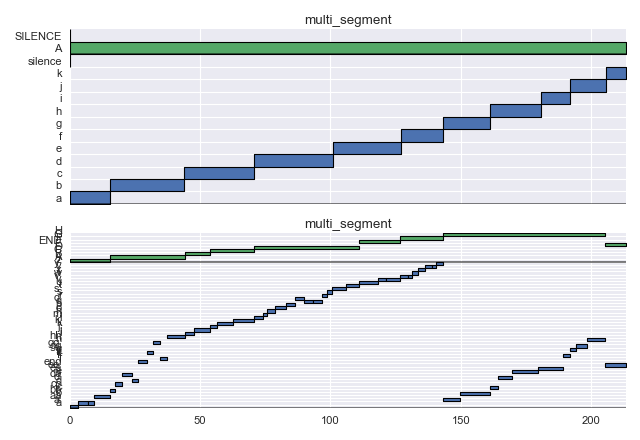

In [40]:
jams.display.display_multi(multis.search(name=lambda x: x in [name1, name2]), meta=False)
plt.tight_layout()

In [95]:
#filename = track_variance['MULTI_L-Measure'].argmin()
#filename = track_variance['MULTI_L-Measure'].argmax()

#filename = track_variance['UPPER_NCE F-measure'].argmax()
#filename = track_variance['UPPER_NCE F-measure'].argmin()

#filename = track_variance['LOWER_NCE F-measure'].argmax()
#filename = track_variance['LOWER_NCE F-measure'].argmin()

#filename = track_variance['UPPER_Pairwise F-measure'].argmax()
#filename = track_variance['UPPER_Pairwise F-measure'].argmin()

#filename = track_variance['LOWER_Pairwise F-measure'].argmax()
#filename = track_variance['LOWER_Pairwise F-measure'].argmin()

In [141]:
filename = track_mean['MULTI_L-Measure'].argmax()
#filename = track_mean['MULTI_L-Measure'].argmin()

#filename = track_mean['UPPER_NCE F-measure'].argmax()
#filename = track_mean['UPPER_NCE F-measure'].argmin()

#filename = track_mean['LOWER_NCE F-measure'].argmax()
#filename = track_mean['LOWER_NCE F-measure'].argmin()

#filename = track_mean['UPPER_Pairwise F-measure'].argmax()
#filename = track_mean['UPPER_Pairwise F-measure'].argmin()

#filename = track_mean['LOWER_Pairwise F-measure'].argmax()
#filename = track_mean['LOWER_Pairwise F-measure'].argmin()

In [142]:
track_mean.loc[filename]

UPPER_NCE F-measure         0.877578
LOWER_NCE F-measure         0.776864
LOWER_Pairwise F-measure    0.717757
UPPER_Pairwise F-measure    0.886575
MULTI_L-Measure             0.819503
Name: Epiphyte_0220_promiscuous.jams, dtype: float64

In [143]:
filename

'Epiphyte_0220_promiscuous.jams'

In [144]:
jam = jams.load(os.path.join('/home/bmcfee/git/msaf-data/SPAM/references/', filename))

In [145]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


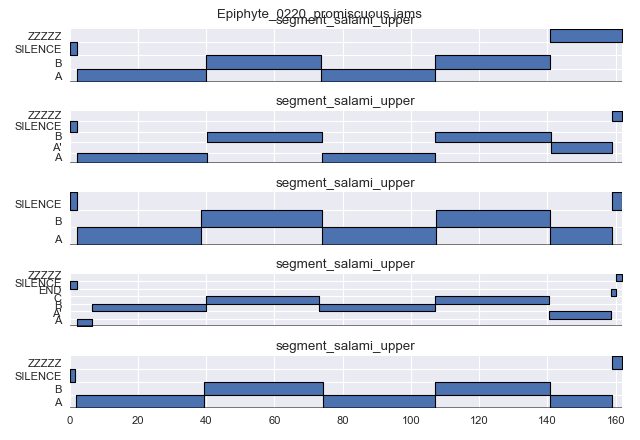

In [146]:
fig, _ = jams.display.display_multi(jam.search(namespace='.*upper'), meta=False)
fig.suptitle(filename)
fig.tight_layout()

<IPython.core.display.Javascript object>


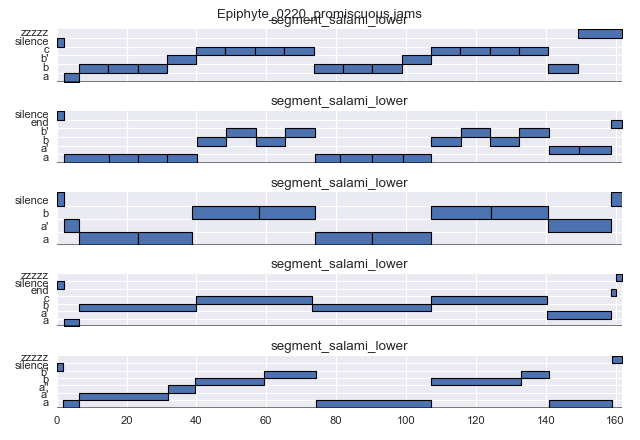

In [147]:
fig, _ = jams.display.display_multi(jam.search(namespace='.*lower'), meta=False)
fig.suptitle(filename)
fig.tight_layout()

<IPython.core.display.Javascript object>


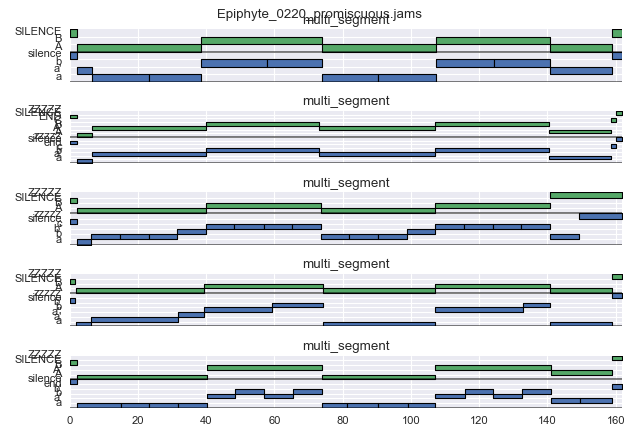

In [149]:
fig, _ = jams.display.display_multi(jam.search(namespace='multi_segment'), meta=False)
fig.suptitle(filename)
fig.tight_layout()

---

<IPython.core.display.Javascript object>


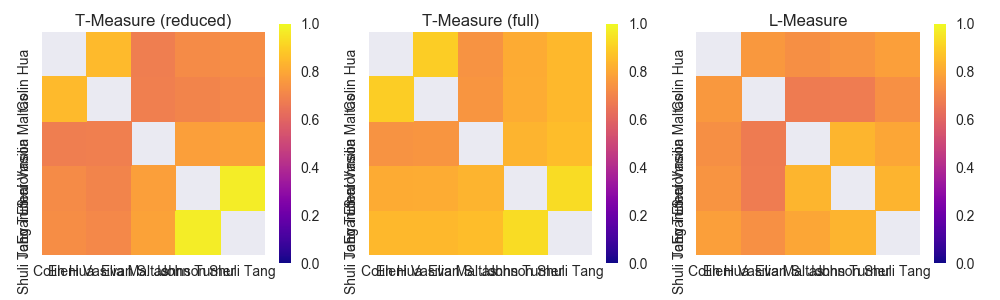

In [73]:
plt.figure(figsize=(10, 3))
plt.subplot(1,3,1)
sns.heatmap(R.iloc[0]['MULTI_T-Measure reduced'], square=True, cmap='plasma', vmin=0.0, vmax=1.)
plt.title('T-Measure (reduced)')
plt.subplot(1,3,2)
sns.heatmap(R.iloc[0]['MULTI_T-Measure full'], square=True, cmap='plasma', vmin=0.0, vmax=1.)
plt.title('T-Measure (full)')
plt.subplot(1,3,3)
sns.heatmap(R.iloc[0]['MULTI_L-Measure'], square=True, cmap='plasma', vmin=0.0, vmax=1.)
plt.title('L-Measure')
plt.tight_layout()

<IPython.core.display.Javascript object>


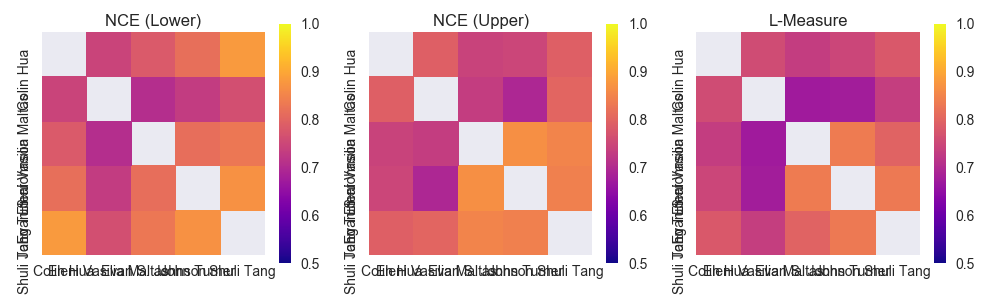

In [74]:
plt.figure(figsize=(10, 3))
plt.subplot(1,3,1)
sns.heatmap(R.iloc[0]['LOWER_NCE F-measure'], square=True, cmap='plasma', vmin=0.5, vmax=1.)
plt.title('NCE (Lower)')
plt.subplot(1,3,2)
sns.heatmap(R.iloc[0]['UPPER_NCE F-measure'], square=True, cmap='plasma', vmin=0.5, vmax=1.)
plt.title('NCE (Upper)')
plt.subplot(1,3,3)
sns.heatmap(R.iloc[0]['MULTI_L-Measure'], square=True, cmap='plasma', vmin=0.5, vmax=1.)
plt.title('L-Measure')
plt.tight_layout()

<IPython.core.display.Javascript object>


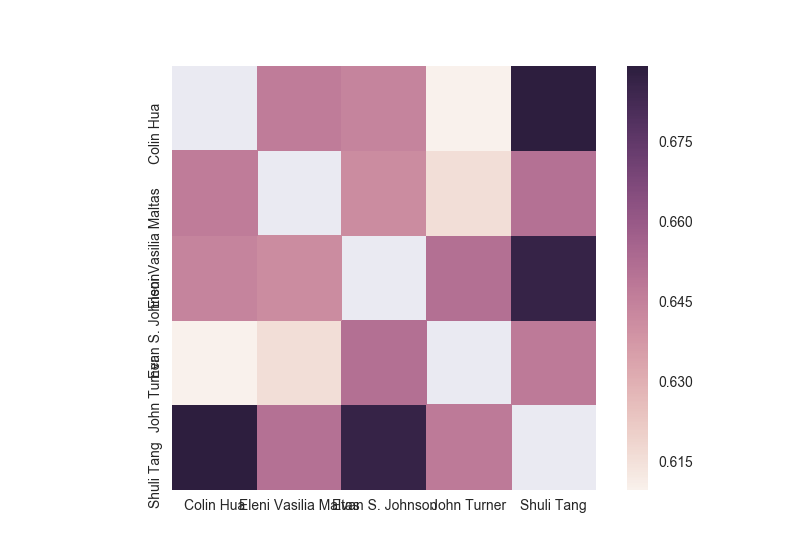

In [58]:
sns.heatmap(R.mean(axis=0)['MULTI_L-Measure'], square=True)

<IPython.core.display.Javascript object>


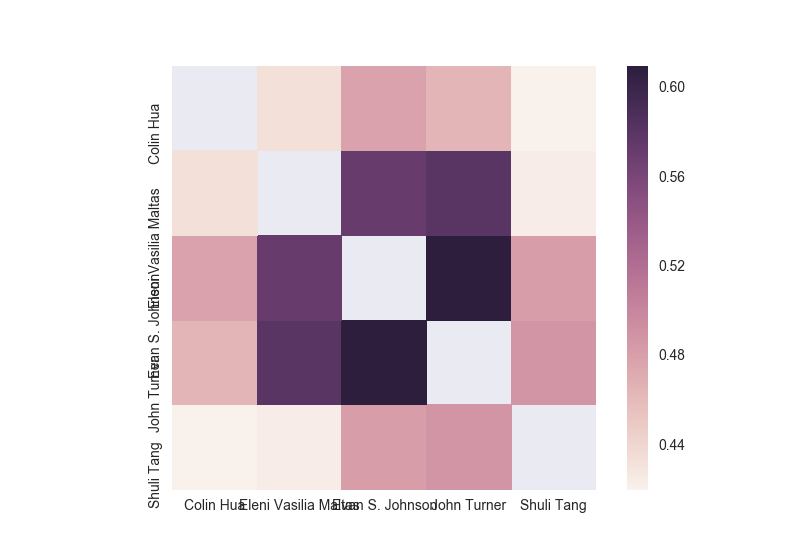

In [57]:
sns.heatmap(R.mean(axis=0)['MULTI_T-Measure reduced'], square=True)

<IPython.core.display.Javascript object>


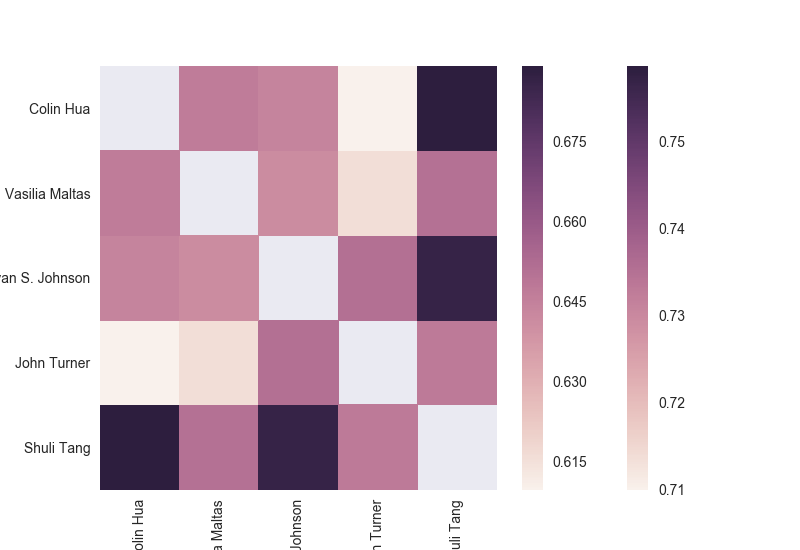

In [44]:
sns.heatmap(R.mean(axis=0)['UPPER_NCE F-measure'])